In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
#Exploration

In [72]:
data = pd.read_csv("crop_production.csv")

In [73]:
data.shape

(20566, 9)

In [74]:
data.tail()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
20561,20561,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2021,37010.20883,NaN
20562,20562,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2022,37069.21485,NaN
20563,20563,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2023,37143.45975,NaN
20564,20564,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2024,37013.65190,NaN
20565,20565,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2025,37041.40158,NaN


In [75]:
data.columns

Index(['index', 'LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY',
       'TIME', 'Value', 'Flag Codes'],
      dtype='object')

In [76]:
data.describe()

,index,TIME,Value,Flag Codes
count,20566.000000,20566.000000,2.056600e+04,0.0
mean,10282.500000,2007.591170,1.249281e+04,NaN
std,5937.037154,10.369489,5.960529e+04,NaN
min,0.000000,1970.000000,0.000000e+00,NaN
25%,5141.250000,1999.000000,1.961877e+00,NaN
50%,10282.500000,2008.000000,2.560970e+01,NaN
75%,15423.750000,2017.000000,1.563000e+03,NaN
max,20565.000000,2025.000000,1.146044e+06,NaN


In [77]:
data.isnull().sum()

index             0
LOCATION          0
INDICATOR         0
SUBJECT           0
MEASURE           0
FREQUENCY         0
TIME              0
Value             0
Flag Codes    20566
dtype: int64

In [78]:
#cleaning

In [79]:
data = data.drop('Flag Codes', axis=1)
data

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815
...,...,...,...,...,...,...,...,...
20561,20561,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2021,37010.208830
20562,20562,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2022,37069.214850
20563,20563,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2023,37143.459750
20564,20564,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2024,37013.651900


In [80]:
#visualization

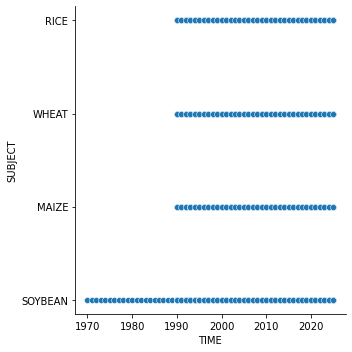

In [81]:
#how crop yield evolved with time
sns.relplot(x='TIME', y='SUBJECT', data=data)

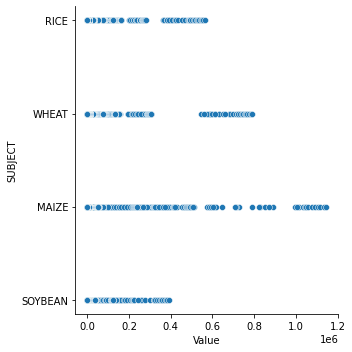

In [82]:
#crop againts value 
sns.relplot(x='Value', y='SUBJECT', data=data)

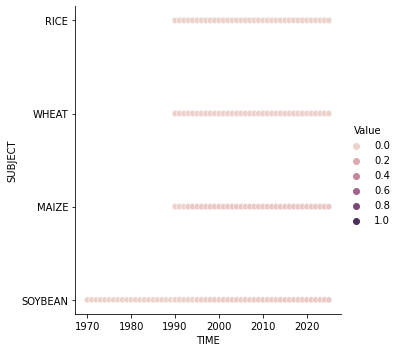

In [83]:
#crop value evolution over time  
sns.relplot(x='TIME', y='SUBJECT', hue='Value',data=data)

In [84]:
#model
data.head()

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SUBJECT'] = le.fit_transform(data['SUBJECT'])


In [88]:
data = pd.get_dummies(data, columns=['SUBJECT'])


In [89]:
train = data.drop(['Value','index','INDICATOR','MEASURE','FREQUENCY','LOCATION'], axis=1)
test = data['Value']

In [90]:
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=2)

In [91]:
regr = LinearRegression()

In [92]:
regr.fit(x_train, y_train)

LinearRegression()

In [93]:
pred = regr.predict(x_test)

In [94]:
pred

array([ 4601.84343823, 21088.00589885,  3218.2814347 , ...,
        7340.71271159,  8060.74844707, 11806.35397929])

In [95]:
#accuracy
regr.score(x_test, y_test)

0.008160440389776591

In [96]:
#my 1st try and accuracy too bad,will do better in the next.